In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 显示多行的执行信息
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
data = pd.read_csv(r"F:\file-转移\网易-菜菜的机器学习\泰坦尼克号预测\data.csv",
#                    index_col = False，
                   engine='python')
data.head()
data.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# 对数据进行预处理
# 删除缺失值过多的列，和观察对于预测没有关系的列
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

# 处理缺失值，对缺失值较多的列进行填补，有一些特征确实只有1~2个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

# 将分类变量转换成数值型变量
# astype能将一个pandas对象转换成某种类型，和apply(int(x))不同，astype可以将文本转换为数字，用这个方法
# 可以很便捷的将二分类的特征转换成0~1
data['Sex'] = (data["Sex"]=="male").astype("int")
# 将三分变量转换为数值类型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))

# 查看处理后的数据集
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [34]:
# 提取标签和特征矩阵，分测试集和训练集
# 选中数据列，这种方法真的受用呀，一下子选中出来了
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
x_train.head()

# 修正测试集和训练集的索引
for i in [x_train,x_test,y_train,y_test]:
    i.index = range(i.shape[0])
    
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
502,503,3,0,29.699118,0,0,7.6292,2
747,748,2,0,30.000000,0,0,13.0000,0
198,199,3,0,29.699118,0,0,7.7500,2
343,344,2,1,25.000000,0,0,13.0000,0
604,605,1,1,35.000000,0,0,26.5500,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,503,3,0,29.699118,0,0,7.6292,2
1,748,2,0,30.000000,0,0,13.0000,0
2,199,3,0,29.699118,0,0,7.7500,2
3,344,2,1,25.000000,0,0,13.0000,0
4,605,1,1,35.000000,0,0,26.5500,1


In [35]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [38]:
# 导入模型，粗略跑一下查看结果
clf = DecisionTreeClassifier(random_state = 25)
clf = clf.fit(x_train,y_train)
score_ = clf.score(x_test,y_test)

score_

score = cross_val_score(clf,x,y,cv =10).mean()
score

0.7490636704119851

0.7469611848825333

0.8166624106230849

([<matplotlib.axis.XTick at 0x24ec1664518>,
 <a list of 10 Text xticklabel objects>)

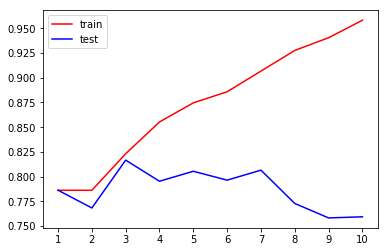

In [44]:
import matplotlib.pyplot as plt
# 在不同的max_depth下观察模型的拟合情况
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state = 25,
                                max_depth = i+1,
                                 criterion = "entropy"
                                )
    clf = clf.fit(x_train,y_train)
    score_tr = clf.score(x_train,y_train)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
max(te)
plt.plot(range(1,11),tr,color = "red",label = "train")
plt.plot(range(1,11),te,color = "blue",label = "test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


In [46]:
# 用网格搜索调整参数
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {
    'splitter':('best','random'),
    'criterion':('gini','entropy'),
    'max_depth':[*range(1,10)],
    'min_samples_leaf':[*range(1,50,5)],
    'min_impurity_decrease':[*np.linspace(0,0.5,20)]
}
clf = DecisionTreeClassifier(random_state = 25)
GS = GridSearchCV(clf,parameters,cv =10)
GS.fit(x_train,y_train)

GS.best_params_
GS.best_score_

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46], 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.131...0526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

0.8279742765273312